In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout,GlobalAveragePooling2D
from keras.applications import VGG16
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.regularizers import l2
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.math import  confusion_matrix
from sklearn.metrics import classification_report
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
# Upload vgg16 pretrained model to use it in the transfer learning
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model

import random
random.seed(10)
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Define the directories and image size
train_directory = '../../dataset/training_set/training_set'
test_directory = '../../dataset/test_set/test_set'
categories = ['cats', 'dogs']  # Update with actual category names
image_size = 224

In [3]:
path_main = "../../dataset/training_set/training_set"   #number of elements in train folder cats and dogs
for folder in os.listdir(path_main):
    list_of_elements = os.listdir(os.path.join(path_main, folder)) 
    
    print(f'Folder: {folder}\n')
    print(f'Number of elements: {len(list_of_elements)}\n')
    print(f'First 3 item\'s name: {list_of_elements[:3]}\n')
    print('***************************')

Folder: cats

Number of elements: 4001

First 3 item's name: ['cat.1.jpg', 'cat.10.jpg', 'cat.100.jpg']

***************************
Folder: dogs

Number of elements: 4006

First 3 item's name: ['dog.1.jpg', 'dog.10.jpg', 'dog.100.jpg']

***************************


In [5]:
path_main = "../../dataset/test_set/test_set"   #number of elements in test folder cats and dogs
for folder in os.listdir(path_main):
    list_of_elements = os.listdir(os.path.join(path_main, folder)) 
    
    print(f'Folder: {folder}\n')
    print(f'Number of elements: {len(list_of_elements)}\n')
    print(f'First 3 item\'s name: {list_of_elements[:3]}\n')
    print('***************************')

Folder: cats

Number of elements: 1012

First 3 item's name: ['cat.4001.jpg', 'cat.4002.jpg', 'cat.4003.jpg']

***************************
Folder: dogs

Number of elements: 1013

First 3 item's name: ['dog.4001.jpg', 'dog.4002.jpg', 'dog.4003.jpg']

***************************


# **Load Training and Testing Images**

In [6]:
# Load training dataset
train_data = []
#plt.figure(figsize=(10, 10))
for label in range(len(categories)):
    class_name = categories[label]
    class_path = os.path.join(train_directory, class_name)
    for image_name in os.listdir(class_path):
        image_path = os.path.join(class_path, image_name)
        image = cv2.imread(image_path)
        if image is not None:
            image_resized = cv2.resize(image, (image_size, image_size))
            train_data.append([image_resized, label])

In [7]:
# Load test dataset
test_data = []
for label in range(len(categories)):
    class_name = categories[label]
    class_path = os.path.join(test_directory, class_name)
    for image_name in os.listdir(class_path):
        image_path = os.path.join(class_path, image_name)
        image = cv2.imread(image_path)
        if image is not None:
            image_resized = cv2.resize(image, (image_size, image_size))
            test_data.append([image_resized, label])

print(f"items in x_test: {len(test_data)}")

items in x_test: 2023


In [8]:
# Shuffle training data
random.shuffle(train_data)

In [9]:
# Split training data into features and labels
X_train = np.array([i[0] for i in train_data])
Y_train = np.array([i[1] for i in train_data])

# Split test data into features and labels
X_test = np.array([i[0] for i in test_data])
Y_test = np.array([i[1] for i in test_data])

In [10]:
# Normalize the images
X_train = X_train / 255.0
X_test = X_test / 255.0

In [11]:
# One-hot encode the labels
Y_train = to_categorical(Y_train, num_classes=len(categories))
Y_test = to_categorical(Y_test, num_classes=len(categories))

# **CNN Model**

In [12]:
# Define the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(image_size, image_size, 3)),
    MaxPooling2D((2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(len(categories), activation='softmax')
])

In [13]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [16]:
# Train the model
history = model.fit(
    X_train, Y_train,
    validation_split=0.2,
    epochs=15,
    batch_size=32
)

Epoch 1/15
201/201 ━━━━━━━━━━━━━━━━━━━━ 155s 731ms/step - accuracy: 0.5392 - loss: 0.9163 - val_accuracy: 0.6221 - val_loss: 0.6681
Epoch 2/15
201/201 ━━━━━━━━━━━━━━━━━━━━ 147s 728ms/step - accuracy: 0.6107 - loss: 0.6638 - val_accuracy: 0.6527 - val_loss: 0.6280
Epoch 3/15
201/201 ━━━━━━━━━━━━━━━━━━━━ 142s 707ms/step - accuracy: 0.6925 - loss: 0.5929 - val_accuracy: 0.6615 - val_loss: 0.6213
Epoch 4/15
201/201 ━━━━━━━━━━━━━━━━━━━━ 137s 680ms/step - accuracy: 0.7651 - loss: 0.5051 - val_accuracy: 0.6702 - val_loss: 0.6010
Epoch 5/15
201/201 ━━━━━━━━━━━━━━━━━━━━ 175s 870ms/step - accuracy: 0.8201 - loss: 0.3936 - val_accuracy: 0.7027 - val_loss: 0.6253
Epoch 6/15
201/201 ━━━━━━━━━━━━━━━━━━━━ 206s 1s/step - accuracy: 0.8923 - loss: 0.2701 - val_accuracy: 0.6958 - val_loss: 0.7308
Epoch 7/15
201/201 ━━━━━━━━━━━━━━━━━━━━ 205s 1s/step - accuracy: 0.9262 - loss: 0.1895 - val_accuracy: 0.6996 - val_loss: 0.8236
Epoch 8/15
201/201 ━━━━━━━━━━━━━━━━━━━━ 176s 876ms/step - accuracy: 0.9451 - loss:

In [17]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, Y_test, verbose=0)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

Test Accuracy: 70.04%


In [18]:
# Generate classification report
Y_pred = model.predict(X_test)
Y_pred_classes = np.argmax(Y_pred, axis=1)
Y_true = np.argmax(Y_test, axis=1)
print(classification_report(Y_true, Y_pred_classes, target_names=categories))

64/64 ━━━━━━━━━━━━━━━━━━━━ 11s 167ms/step
              precision    recall  f1-score   support

        cats       0.69      0.72      0.71      1011
        dogs       0.71      0.68      0.69      1012

    accuracy                           0.70      2023
   macro avg       0.70      0.70      0.70      2023
weighted avg       0.70      0.70      0.70      2023



In [ ]:
# Plot training and validation accuracy and loss
plt.figure(figsize=(12, 6))

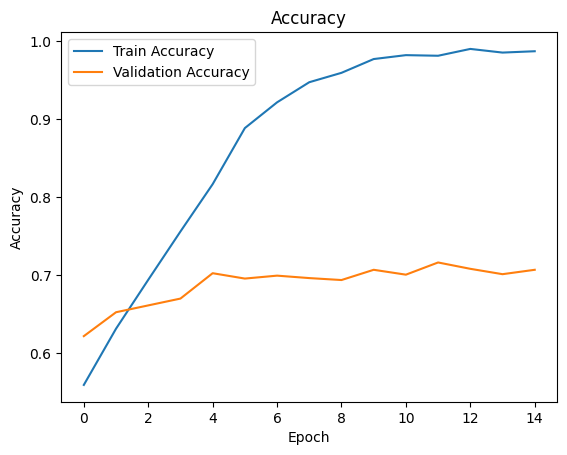

In [26]:
# Plot accuracy
# plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

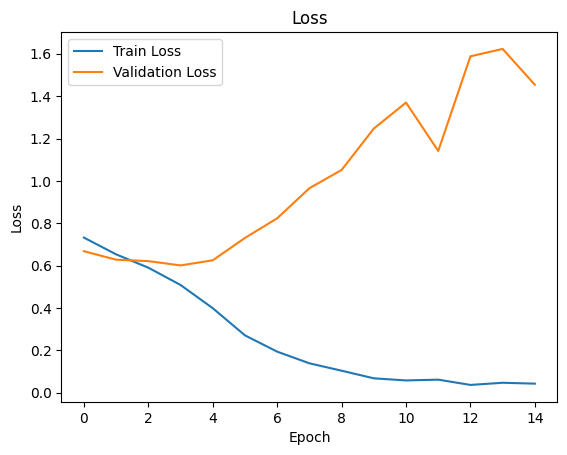

In [27]:
# Plot loss
# plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

In [22]:
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>